## Import Necessary Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()
import os 
import warnings
warnings.filterwarnings('ignore')

#### Merge 12 months data into a single CSV file

In [2]:
# Use OS Module to load all files in a directory.

files = [file for file in os.listdir('./Sales_Datas')]

# Create empty dataframe and concat each data file into a single file.

all_months_data = pd.DataFrame() 

for data in files:
    df = pd.read_csv('./Sales_Datas/'+ data)
    all_months_data = pd.concat([all_months_data, df]) 

# Save merged data into a single csv file and store in direcory.

all_months_data.to_csv('all_data.csv', index = False)

#### Read updated dataframe

In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean Dataframe

#### Check how many rows with NaN are present

In [4]:
nan_df = all_data[all_data.isna().any(axis = 1)] 
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


#### Drop raws with NaN values

In [5]:
all_data = all_data.dropna(how= 'all') 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find "Or" and delete it 

In [6]:
temp_data = all_data[all_data['Order Date'].str[0:2] == 'Or'] 
temp_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
# Delete rows with "Or" values from Oreder Date column

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Augment data with additional columns

#### Add month column

In [8]:
# Convert data type in oreder date column into string and extract first two characters.

all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Add sales column

In [9]:
# Convert "Quantity Ordered" and "Price Each" columns data type into numeric values.

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [10]:
# Multiply "Quantity Ordered" and "Price Each" columns to create "Sales" column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


#### Add City column

In [11]:
# Use apply method and split function to 'Purchase Address' column and get each city.

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


#### Add hour and minute column

In [12]:
# Convert Order Date column data type into datetime to acces time.

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [13]:
# Use pandas date time function to extract hours from "Order Date" column.

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

#### Convert Mnoth column into integer

In [14]:
all_data['Month'] = all_data['Month'].astype('int')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


#### Q1: what was best month in sales and how much was it?

In [15]:
# Use groupby function to find best month
result = all_data.groupby('Month').sum()  
result

,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
1,10903,1.811768e+06,1.822257e+06,139485,282440
2,13449,2.188885e+06,2.202022e+06,172669,354885
3,17005,2.791208e+06,2.807100e+06,218969,447559
4,20558,3.367671e+06,3.390670e+06,262259,544186
5,18667,3.135125e+06,3.152607e+06,238780,487899
6,15253,2.562026e+06,2.577802e+06,195528,402436
7,16072,2.632540e+06,2.647776e+06,206169,417349
8,13448,2.230345e+06,2.244468e+06,172289,353857
9,13109,2.084992e+06,2.097560e+06,168513,341698


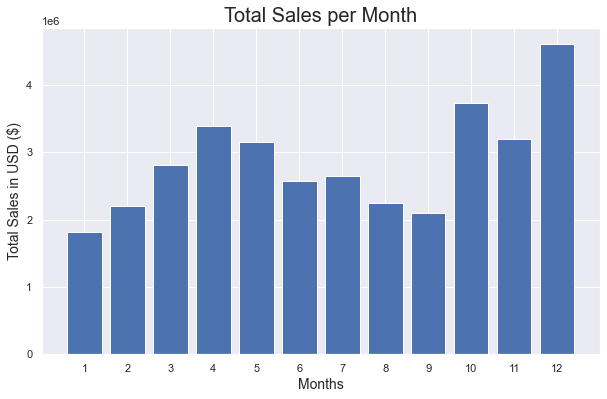

In [16]:
# Use matplotlib to show in bar graph which month has best sales.

months = range(1,13)
plt.figure(figsize= (10,6))
plt.bar(x= months, height= result['Sales'] ) 
plt.xticks(months)
plt.xlabel('Months', fontsize= 14)
plt.ylabel('Total Sales in USD ($)', fontsize= 14)
plt.title('Total Sales per Month', fontsize= 20)
plt.show()

In [17]:
# Above figure shows December is the best month as per sales

#### Q2: Which city had higher number of sales?

In [18]:
sales_city = all_data.groupby('City').sum()
sales_city

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06,214264,442932
Austin (TX),11153,1.809874e+06,69829,1.819582e+06,141946,289060
Boston (MA),22528,3.637410e+06,141112,3.661642e+06,288225,590442
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06,214390,435155
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06,427444,866638
New York City (NY),27932,4.635371e+06,175741,4.664317e+06,357696,733598
Portland (ME),2750,4.471893e+05,17144,4.497583e+05,35211,72856
Portland (OR),11303,1.860558e+06,70621,1.870732e+06,144421,295533
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06,643265,1319477


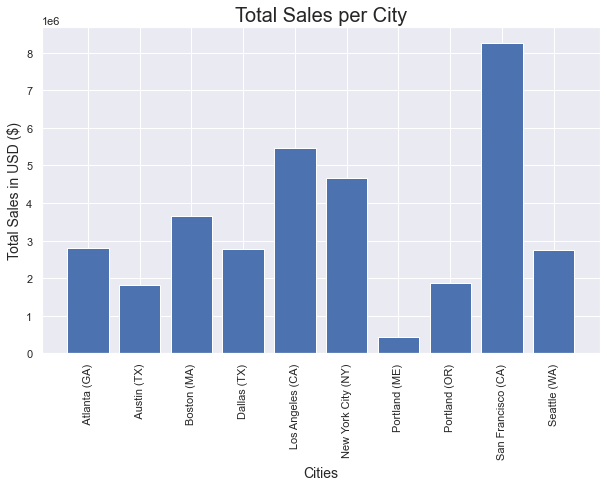

In [19]:
plt.figure(figsize= (10,6))
plt.bar(x= sales_city.index, height= sales_city['Sales'])
plt.xlabel('Cities', fontsize= 14)
plt.ylabel('Total Sales in USD ($)', fontsize= 14)
plt.title('Total Sales per City', fontsize= 20)
plt.xticks(rotation = 'vertical')
plt.show()

In [20]:
# It is clear that San Francisco(CA) has higher number of sales.

#### Q3: What time should we display advertisements to maximamise likelihood of customer's buying product?

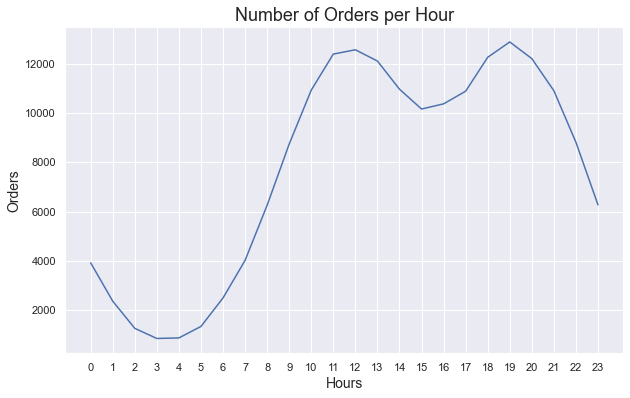

In [21]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.figure(figsize=(10,6))
plt.plot(hours, all_data.groupby('Hour').count()['Order ID'])
plt.xticks(hours)
plt.xlabel('Hours', fontsize = 14)
plt.ylabel('Orders', fontsize = 14)
plt.title('Number of Orders per Hour', fontsize = 18)
plt.show()

In [22]:
# From above graph it is clear that recommended time is around 11 AM and 18 PM.

#### Q4: Which products are most often sold together

In [23]:
# Need to find duplicates in order ID to find products order together. So create new dataframe which has only has duplicates.
duplicate_df = all_data[all_data.duplicated('Order ID', keep= False)]

# Create new column called 'Grouped' which contains grouped products bought together
duplicate_df['Grouped'] = duplicate_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x) ) 
duplicate_df = duplicate_df[['Order ID','Grouped']].drop_duplicates() 
duplicate_df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [24]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in duplicate_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [25]:
# It is clear that 'iPhone', 'Lightning Charging Cable' combination is sold most.

#### Q5: Which Product Sold the most? Why do think its sold most?

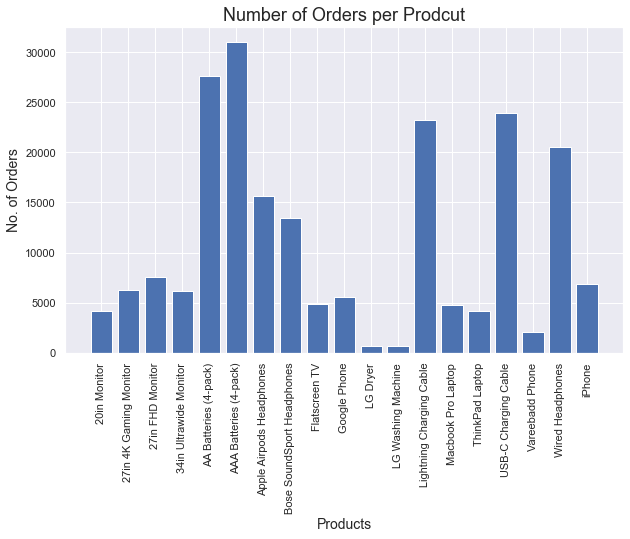

In [26]:
product_ordered = all_data.groupby('Product')['Quantity Ordered'].sum()
product_list = [product for product, df in all_data.groupby('Product')]

plt.figure(figsize=(10,6))
plt.bar(product_list, product_ordered)
plt.xticks(rotation = 'vertical')
plt.xlabel('Products', fontsize = 14)
plt.ylabel('No. of Orders', fontsize = 14)
plt.title('Number of Orders per Prodcut', fontsize = 18)
plt.show()

In [27]:
# Batteries and charging cables are most sold products

In [28]:
prices = all_data.groupby('Product')['Price Each'].mean()
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


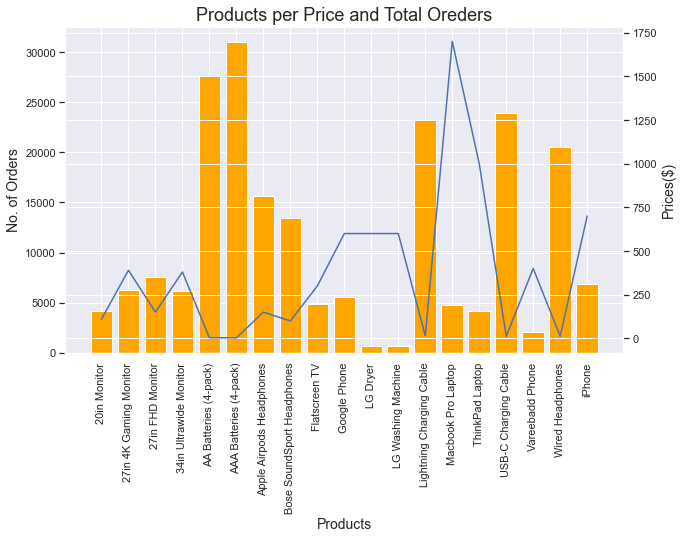

In [29]:
# Compare Products with Price and total number of orders.

fig, ax1 = plt.subplots(figsize = (10,6))
ax2 = ax1.twinx()
ax1.bar(product_list, product_ordered, color = 'orange')
ax2.plot(product_list, prices, 'b-')
ax1.set_xlabel('Products', fontsize = 14)
ax1.set_ylabel('No. of Orders', fontsize = 14)
ax2.set_ylabel('Prices($)', fontsize = 14)
ax1.set_title('Products per Price and Total Oreders', fontsize = 18)
ax1.set_xticklabels(product_list, rotation = 'vertical')
plt.show()

In [30]:
# From above figure it is clear that total orders and price are inversely prepotional. That might be one reason 
# batteries and charging cables are most sold items.